In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [45]:
x,y = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=3)

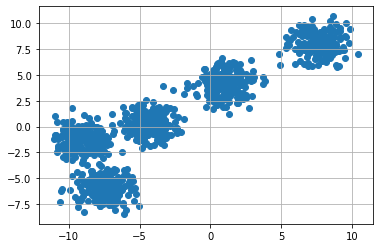

In [46]:
plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [47]:
k = 5

color=['green','red','blue','yellow','gray']

clusters = {}
for i in range(k):
    center = 10*(2*np.random.random((x.shape[1]),)-1)
    points= []
    

    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i] = cluster

In [48]:
def distance(v1,v2):
    return np.sqrt(np.sum(v1-v2)**2)

In [49]:
# Assign every data point to one of the clusters
def assignPointToClusters(clusters):#E-step
    
    for ix in range(x.shape[0]):
        
        dist = []
        for kx in range(k):
            d = distance(x[ix],clusters[kx]['center'])
            dist.append(d)
            
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(x[ix])

In [50]:
def updateClusters(clusters):#M-Step -> We update every cluster center
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:#if cluster has some non zero points
            new_mean = pts.mean(axis=0)
            clusters[kx]['center'] = new_mean
            #clear my points list
            clusters[kx]['points'] = []
            
    

In [51]:
def plotClusters(clusters):
    
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])
        
        try:
            plt.scatter(pts[:,0],pts[:,1],color = clusters[kx]['color'])
        except:
            pass
        
        #plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')

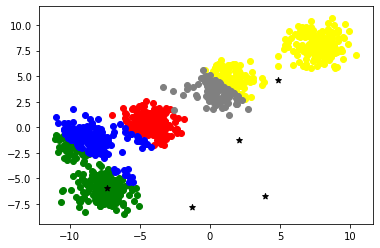

In [52]:
assignPointToClusters(clusters)
plotClusters(clusters)

In [80]:
#Repeat the process of step 2 and step 3 until convergence
count = 1
while True:
    assignPointToClusters(clusters)
    updateClusters(clusters)
    count += 1
    if count>100:
        break

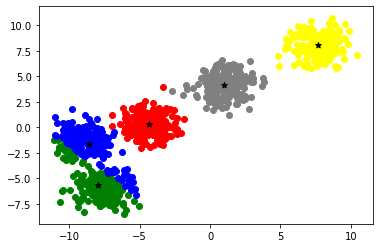

In [96]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)